# Time Series Exploratory Notebook

In [1]:
# load dependencies
import matplotlib.pyplot as plt
import statsmodels
import pandas as pd

## Historic Data

### Import data

In [2]:
# historic dataset
path = "../data/raw/"
file = "100014.csv"
df = pd.read_csv(path + file, sep=";")

### Dataset info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482557 entries, 0 to 482556
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Publikationszeit  482557 non-null  object
 1   Anzahl frei       482557 non-null  int64 
 2   id                482557 non-null  object
 3   id2               482557 non-null  object
 4   Titel             482557 non-null  object
 5   Name              482557 non-null  object
 6   Adresse           482557 non-null  object
 7   Total Plätze      482557 non-null  int64 
 8   link              482557 non-null  object
 9   geo_point_2d      482557 non-null  object
 10  Beschreibung      482557 non-null  object
dtypes: int64(2), object(9)
memory usage: 40.5+ MB


**Description:** There are 11 columns with information in the dataset. Most of them are of dtype object. Two columns `Anzahl frei` and `Total Plätze` are of type int64 which is a good sign since we only expect nummeric characters there.

### Columns with na values

In [4]:
df.isna().any()

Publikationszeit    False
Anzahl frei         False
id                  False
id2                 False
Titel               False
Name                False
Adresse             False
Total Plätze        False
link                False
geo_point_2d        False
Beschreibung        False
dtype: bool

**Description:** There are no missing values in any columns of the historic dataset. All entries seem to be complete.

### Nr of garages in the dataset

In [5]:
df[["id", "id2", "Titel"]].drop_duplicates().reset_index(drop=True)

,id,id2,Titel
0,baselparkhauspostbasel,postbasel,Parkhaus Post Basel
1,baselparkhausbahnhofsued,bahnhofsued,Parkhaus Bahnhof Süd
2,baselparkhausbadbahnhof,badbahnhof,Parkhaus Bad. Bahnhof
3,baselparkhauseurope,europe,Parkhaus Europe
4,baselparkhaussteinen,steinen,Parkhaus Steinen
5,baselparkhausstorchen,storchen,Parkhaus Storchen
6,baselparkhauscentralbahnparking,centralbahnparking,Parkhaus Centralbahnparking
7,baselparkhausaeschen,aeschen,Parkhaus Aeschen
8,baselparkhausanfos,anfos,Parkhaus Anfos
9,baselparkhauscity,city,Parkhaus City


**Description:** There are a total of 16 distinct garages in the dataset. 

### Nr of entries per garage

In [6]:
df[["Titel", "Publikationszeit"]].groupby("Titel").count()

,Publikationszeit
Titel,
Parkhaus Aeschen,31703
Parkhaus Anfos,31703
Parkhaus Bad. Bahnhof,31703
Parkhaus Bahnhof Süd,31703
Parkhaus Centralbahnparking,31703
Parkhaus City,31437
Parkhaus Clarahuus,31703
Parkhaus Claramatte,31703
Parkhaus Elisabethen,31703


**Description:** There is only one garage: "Parkhaus Kunstmuseum" which contains less entries than the rest.

### Nr unique of `Total Parkplätze`

In [7]:
df[["Titel", "Total Plätze"]].groupby("Titel").nunique()

,Total Plätze
Titel,
Parkhaus Aeschen,1
Parkhaus Anfos,1
Parkhaus Bad. Bahnhof,2
Parkhaus Bahnhof Süd,1
Parkhaus Centralbahnparking,1
Parkhaus City,1
Parkhaus Clarahuus,1
Parkhaus Claramatte,2
Parkhaus Elisabethen,1


**Description:** Most garages have a constant number of parking spots for the duration of the dataset. However there are also two garages with 2 different totals: "Parkhaus Bad. Bahnhof" and "Parkhaus Claramatte". In a next step, we want to investigate the reason for this.

In [8]:
def show_total_spots_timeline(df, name, last_n_entries=None):
    '''
    Creates a lineplit with the total nr of available parking spots for as single garage
    '''
    df = df.copy()
    df = df[df["Titel"]==name][["Publikationszeit", "Total Plätze"]].sort_values(by = "Publikationszeit").reset_index(drop=True)
    
    df["Publikationszeit"] = pd.to_datetime(df["Publikationszeit"])
    
    if last_n_entries:
        df = df[-last_n_entries:]
        
    df = df.sort_values(by="Publikationszeit")
    
    plt.figure(figsize=(16,5))
    plt.title(f"Total nr of parking spots for: {name}")
    plt.plot(df["Publikationszeit"], df["Total Plätze"])
    plt.xlabel("Timeline")
    plt.ylabel("Total spots")
    plt.show()

### Timeline for "Parkhaus Bad. Bahnhof"

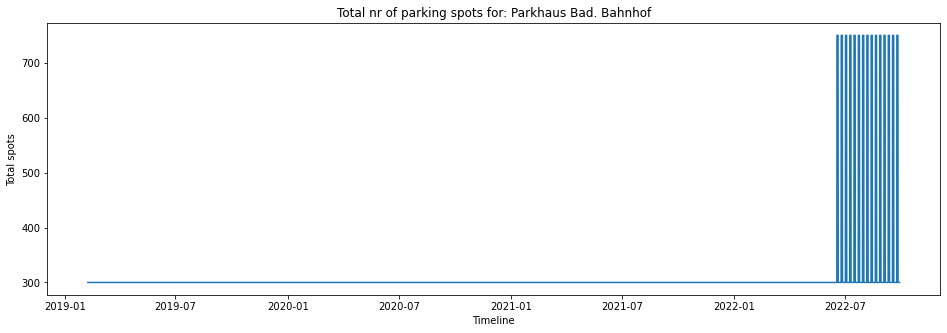

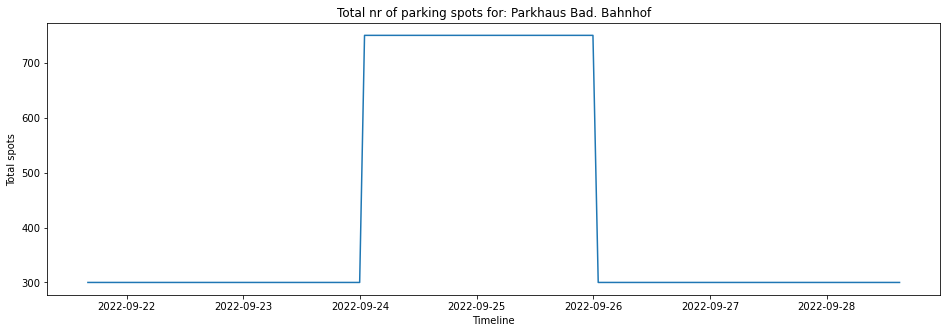

In [9]:
show_total_spots_timeline(df, name = "Parkhaus Bad. Bahnhof")    
show_total_spots_timeline(df, name = "Parkhaus Bad. Bahnhof", last_n_entries=7*24)

### Timeline for "Parkhaus Claramatte"

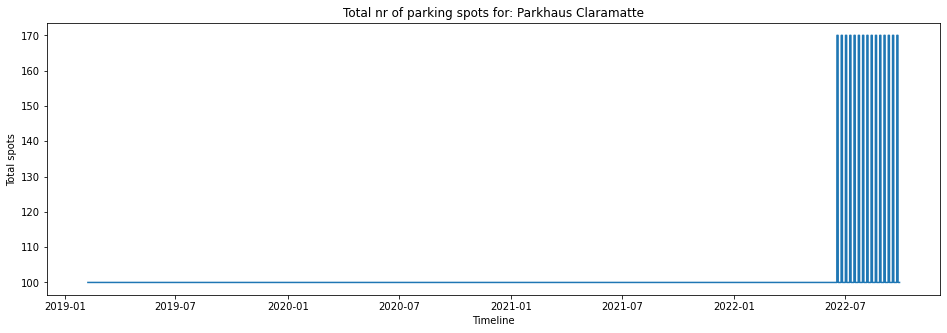

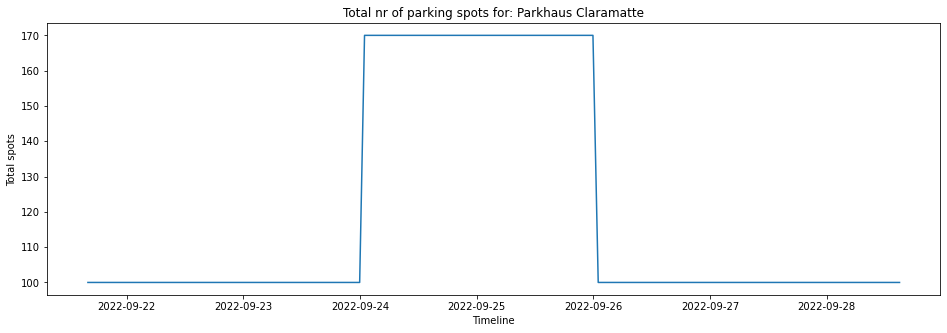

In [10]:
show_total_spots_timeline(df, name = "Parkhaus Claramatte")    
show_total_spots_timeline(df, name = "Parkhaus Claramatte", last_n_entries=7*24)